This project uses machine learning models to predict an employee's likelihood to leave an organization. This model is based on the attrition yes/no column to predict which features has the most effect on employee churn. 

In [108]:
import pandas as pd
import numpy as np

In [109]:
#read data into a dataframe for analysis 
df=pd.read_csv("Downloads/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Exploratory data analysis is an essential part of every machine learning project. Researchers discover patterns about their data and allows them to engineer features to optimize their models. One of the first steps in understanding the table is looking at its structure by identifying datatypes and spotting null values.  

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Based on the output from the info() function shows that we have both int and object datatypes with no nulls. The describe function in pandas provides summary statistics of the int data types 

In [111]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


The summary stastistics was able to give us insights in understanding our dataset. For example, the mean total working years of employees was 11 but the mean YearswithCurrManager and YearsinCurrent role is 4. Which tells us that most employees have some type of movement within the organization. Its also an indicator that some variables may be highly correlated to each other. Another way to understand the data is adding them to visualizations. 

In [112]:
#first lets create a dataset that isolates only the int datatypes

df_int=df.select_dtypes(include=['int'])
df_int.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   DailyRate                 1470 non-null   int64
 2   DistanceFromHome          1470 non-null   int64
 3   Education                 1470 non-null   int64
 4   EmployeeCount             1470 non-null   int64
 5   EmployeeNumber            1470 non-null   int64
 6   EnvironmentSatisfaction   1470 non-null   int64
 7   HourlyRate                1470 non-null   int64
 8   JobInvolvement            1470 non-null   int64
 9   JobLevel                  1470 non-null   int64
 10  JobSatisfaction           1470 non-null   int64
 11  MonthlyIncome             1470 non-null   int64
 12  MonthlyRate               1470 non-null   int64
 13  NumCompaniesWorked        1470 non-null   int64
 14  PercentSalaryHike         1470 non-null 

Python offers several visualization libraries. For this project, the seaborn plot is used to generate the histogram while the matplotlibh offers options to adjust the layout and the size of each chart

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\ait0s\AppData\Local\Temp\ipykernel_41452\3123519159.py:4: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



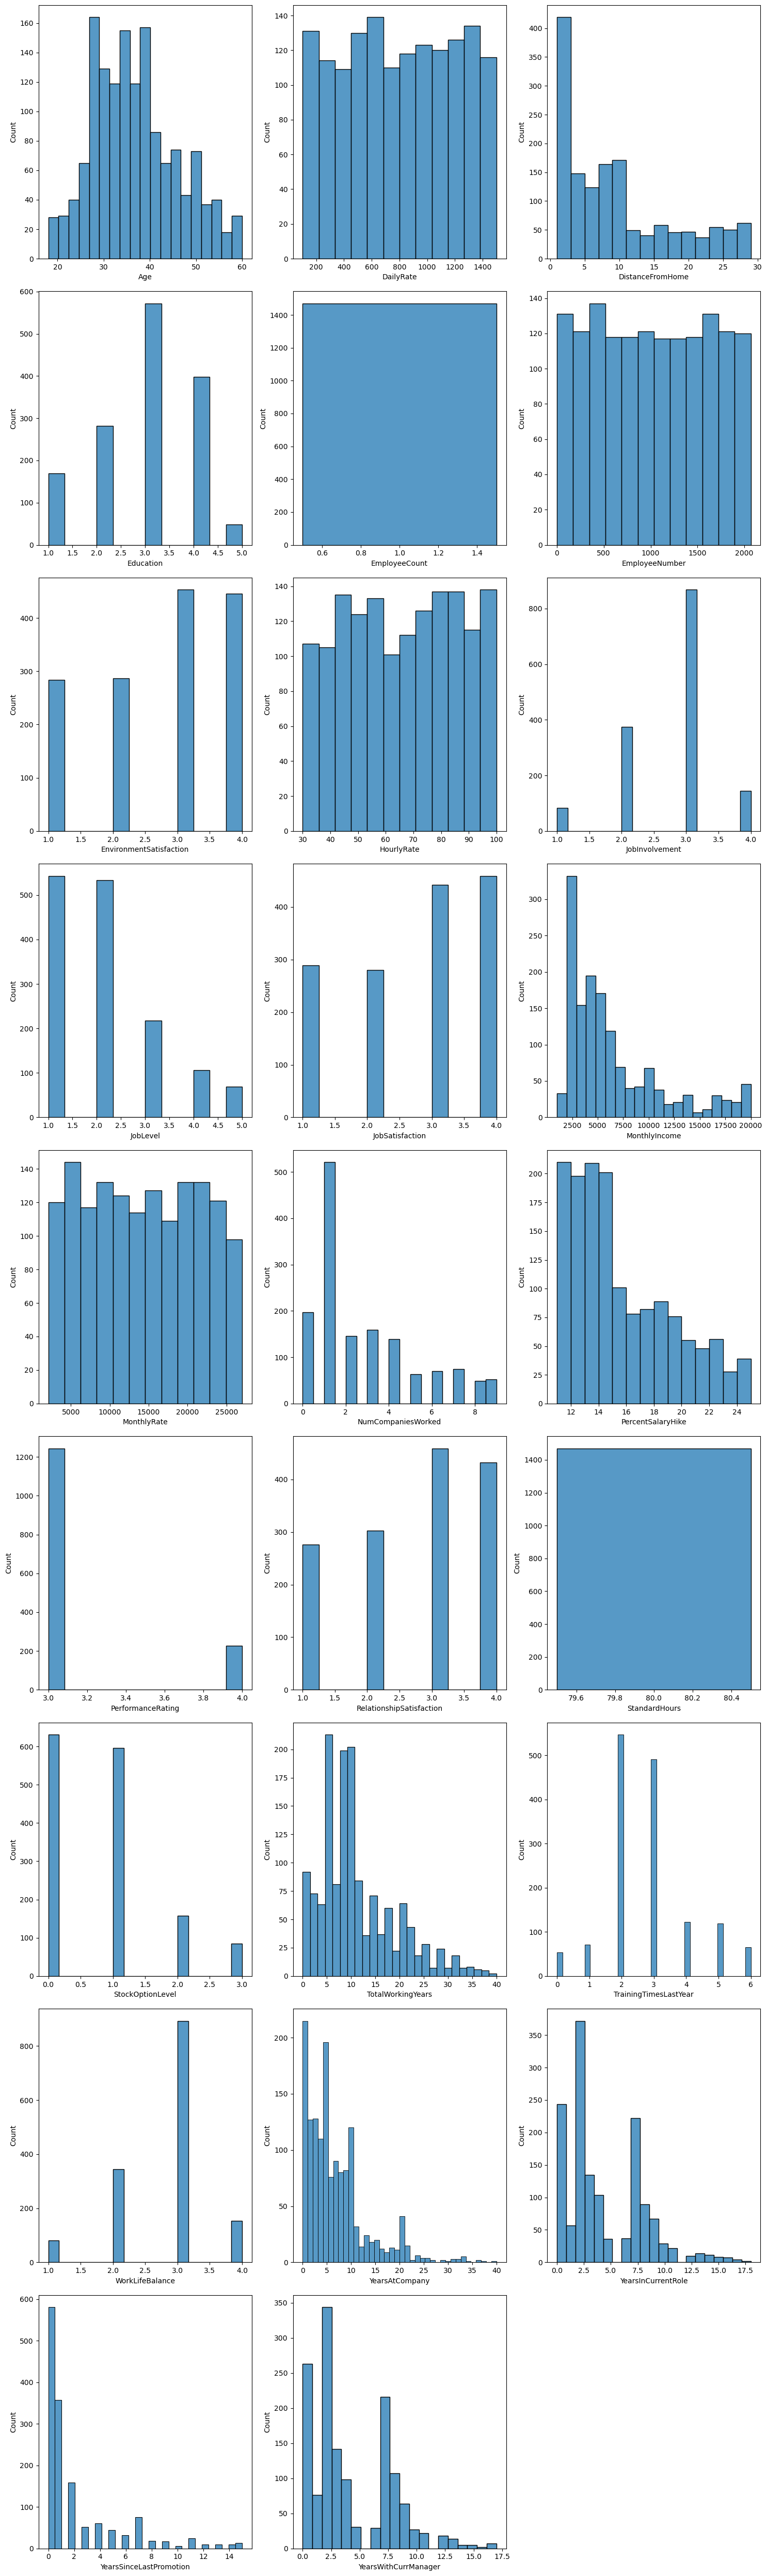

In [114]:
#create a series of histograms using the int only dataset
plt.subplots(figsize = (15,50))
for i, col in enumerate(df_int):
    plt.subplot(9,3, i+1)
    sns.histplot(df[col])
plt.tight_layout()
plt.show()

The histograms gives us a better overview of the data. For example, we know we can drop the emp_count and the standard hours as they only show one value. We can get remove these features from our project. For categorical variable, much like df_int, we can create a new df and pivot it to give us a summary of the non-int data

In [115]:
objcols=df.select_dtypes(include=object).columns.tolist()
df_obj=pd.DataFrame(df[objcols].melt(var_name='column', value_name='value').value_counts()).rename(columns={0:'count'}).sort_values(by=['column','count'])
display(df_obj)


count
column         value                           
Attrition      Yes                          237
               No                          1233
BusinessTravel Non-Travel                   150
               Travel_Frequently            277
               Travel_Rarely               1043
Department     Human Resources               63
               Sales                        446
               Research & Development       961
EducationField Human Resources               27
               Other                         82
               Technical Degree             132
               Marketing                    159
               Medical                      464
               Life Sciences                606
Gender         Female                       588
               Male                         882
JobRole        Human Resources               52
               Research Director             80
               Sales Representative          83
               Manager                      102
               Healthcare Representative    131
               Manufacturing Director       145
               Laboratory Technician        259
               Research Scientist           292
               Sales Executive              326
MaritalStatus  Divorced                     327
               Single                       470
               Married                      673
Over18         Y                           1470
OverTime       Yes                          416
               No                          1054

The pivoted object dataframe shows the distribution of the different values that are non-int. We see that our target variable has two values, yes and no, with majority of the values is a no. We also see that the Over18 column only has one value, so thats one column that we can also eliminate. Just as we did with the int datatypes, we can create some visualizations with the object datatypes. The plotly/plotly express library helps us create different types of charts with our data in a single function call. 

In [116]:
import plotly.express as px

On a personal note, I think salary is a big factor when someone leaves a job. I'd like to to see how salaries are distributed across job roles and what the attrition rate for it is. 

In [117]:
df_jobpay=df.groupby('JobRole')['MonthlyIncome'].mean()
df_jobpay

JobRole
Healthcare Representative     7528.763359
Human Resources               4235.750000
Laboratory Technician         3237.169884
Manager                      17181.676471
Manufacturing Director        7295.137931
Research Director            16033.550000
Research Scientist            3239.972603
Sales Executive               6924.279141
Sales Representative          2626.000000
Name: MonthlyIncome, dtype: float64

In [118]:
jobchart=px.bar(df_jobpay)
jobchart.show()

In [119]:
#now lets look at attrition by job

attbyjob=df.groupby('JobRole')['Attrition'].count()
attbyjobchart=px.bar(attbyjob)
attbyjobchart.show()

The three job roles with the lowest median pay are Laboratory Technician, Research Scientist, and Sales Representative while the job roles with the highest attrition are Sales Executive, Research Scientist, Laboratory Technician. So 2 out of the three roles are correlated. However, considering the number of features in a dataset, we would be using correlation matrix for the int types and chi-square test for the object type columns.

In [120]:
#Earlier, we determined columns to drop. Lets drop it before we do the correlation
colstodrop=['EmployeeCount','StandardHours','EmployeeNumber']
df_int.drop(df_int[colstodrop], axis=1, inplace=True)
corr_matrix=df_int.corr().round(2)
corr_matrix

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.00,0.01,-0.00,0.21,0.01,0.02,0.03,0.51,-0.00,0.50,...,0.00,0.05,0.04,0.68,-0.02,-0.02,0.31,0.21,0.22,0.20
DailyRate,0.01,1.00,-0.00,-0.02,0.02,0.02,0.05,0.00,0.03,0.01,...,0.00,0.01,0.04,0.01,0.00,-0.04,-0.03,0.01,-0.03,-0.03
DistanceFromHome,-0.00,-0.00,1.00,0.02,-0.02,0.03,0.01,0.01,-0.00,-0.02,...,0.03,0.01,0.04,0.00,-0.04,-0.03,0.01,0.02,0.01,0.01
Education,0.21,-0.02,0.02,1.00,-0.03,0.02,0.04,0.10,-0.01,0.09,...,-0.02,-0.01,0.02,0.15,-0.03,0.01,0.07,0.06,0.05,0.07
EnvironmentSatisfaction,0.01,0.02,-0.02,-0.03,1.00,-0.05,-0.01,0.00,-0.01,-0.01,...,-0.03,0.01,0.00,-0.00,-0.02,0.03,0.00,0.02,0.02,-0.00
HourlyRate,0.02,0.02,0.03,0.02,-0.05,1.00,0.04,-0.03,-0.07,-0.02,...,-0.00,0.00,0.05,-0.00,-0.01,-0.00,-0.02,-0.02,-0.03,-0.02
JobInvolvement,0.03,0.05,0.01,0.04,-0.01,0.04,1.00,-0.01,-0.02,-0.02,...,-0.03,0.03,0.02,-0.01,-0.02,-0.01,-0.02,0.01,-0.02,0.03
JobLevel,0.51,0.00,0.01,0.10,0.00,-0.03,-0.01,1.00,-0.00,0.95,...,-0.02,0.02,0.01,0.78,-0.02,0.04,0.53,0.39,0.35,0.38
JobSatisfaction,-0.00,0.03,-0.00,-0.01,-0.01,-0.07,-0.02,-0.00,1.00,-0.01,...,0.00,-0.01,0.01,-0.02,-0.01,-0.02,-0.00,-0.00,-0.02,-0.03
MonthlyIncome,0.50,0.01,-0.02,0.09,-0.01,-0.02,-0.02,0.95,-0.01,1.00,...,-0.02,0.03,0.01,0.77,-0.02,0.03,0.51,0.36,0.34,0.34


In [121]:
#correlation matrices, especially with this many features, are harder to read. use a visualization

import seaborn as sns

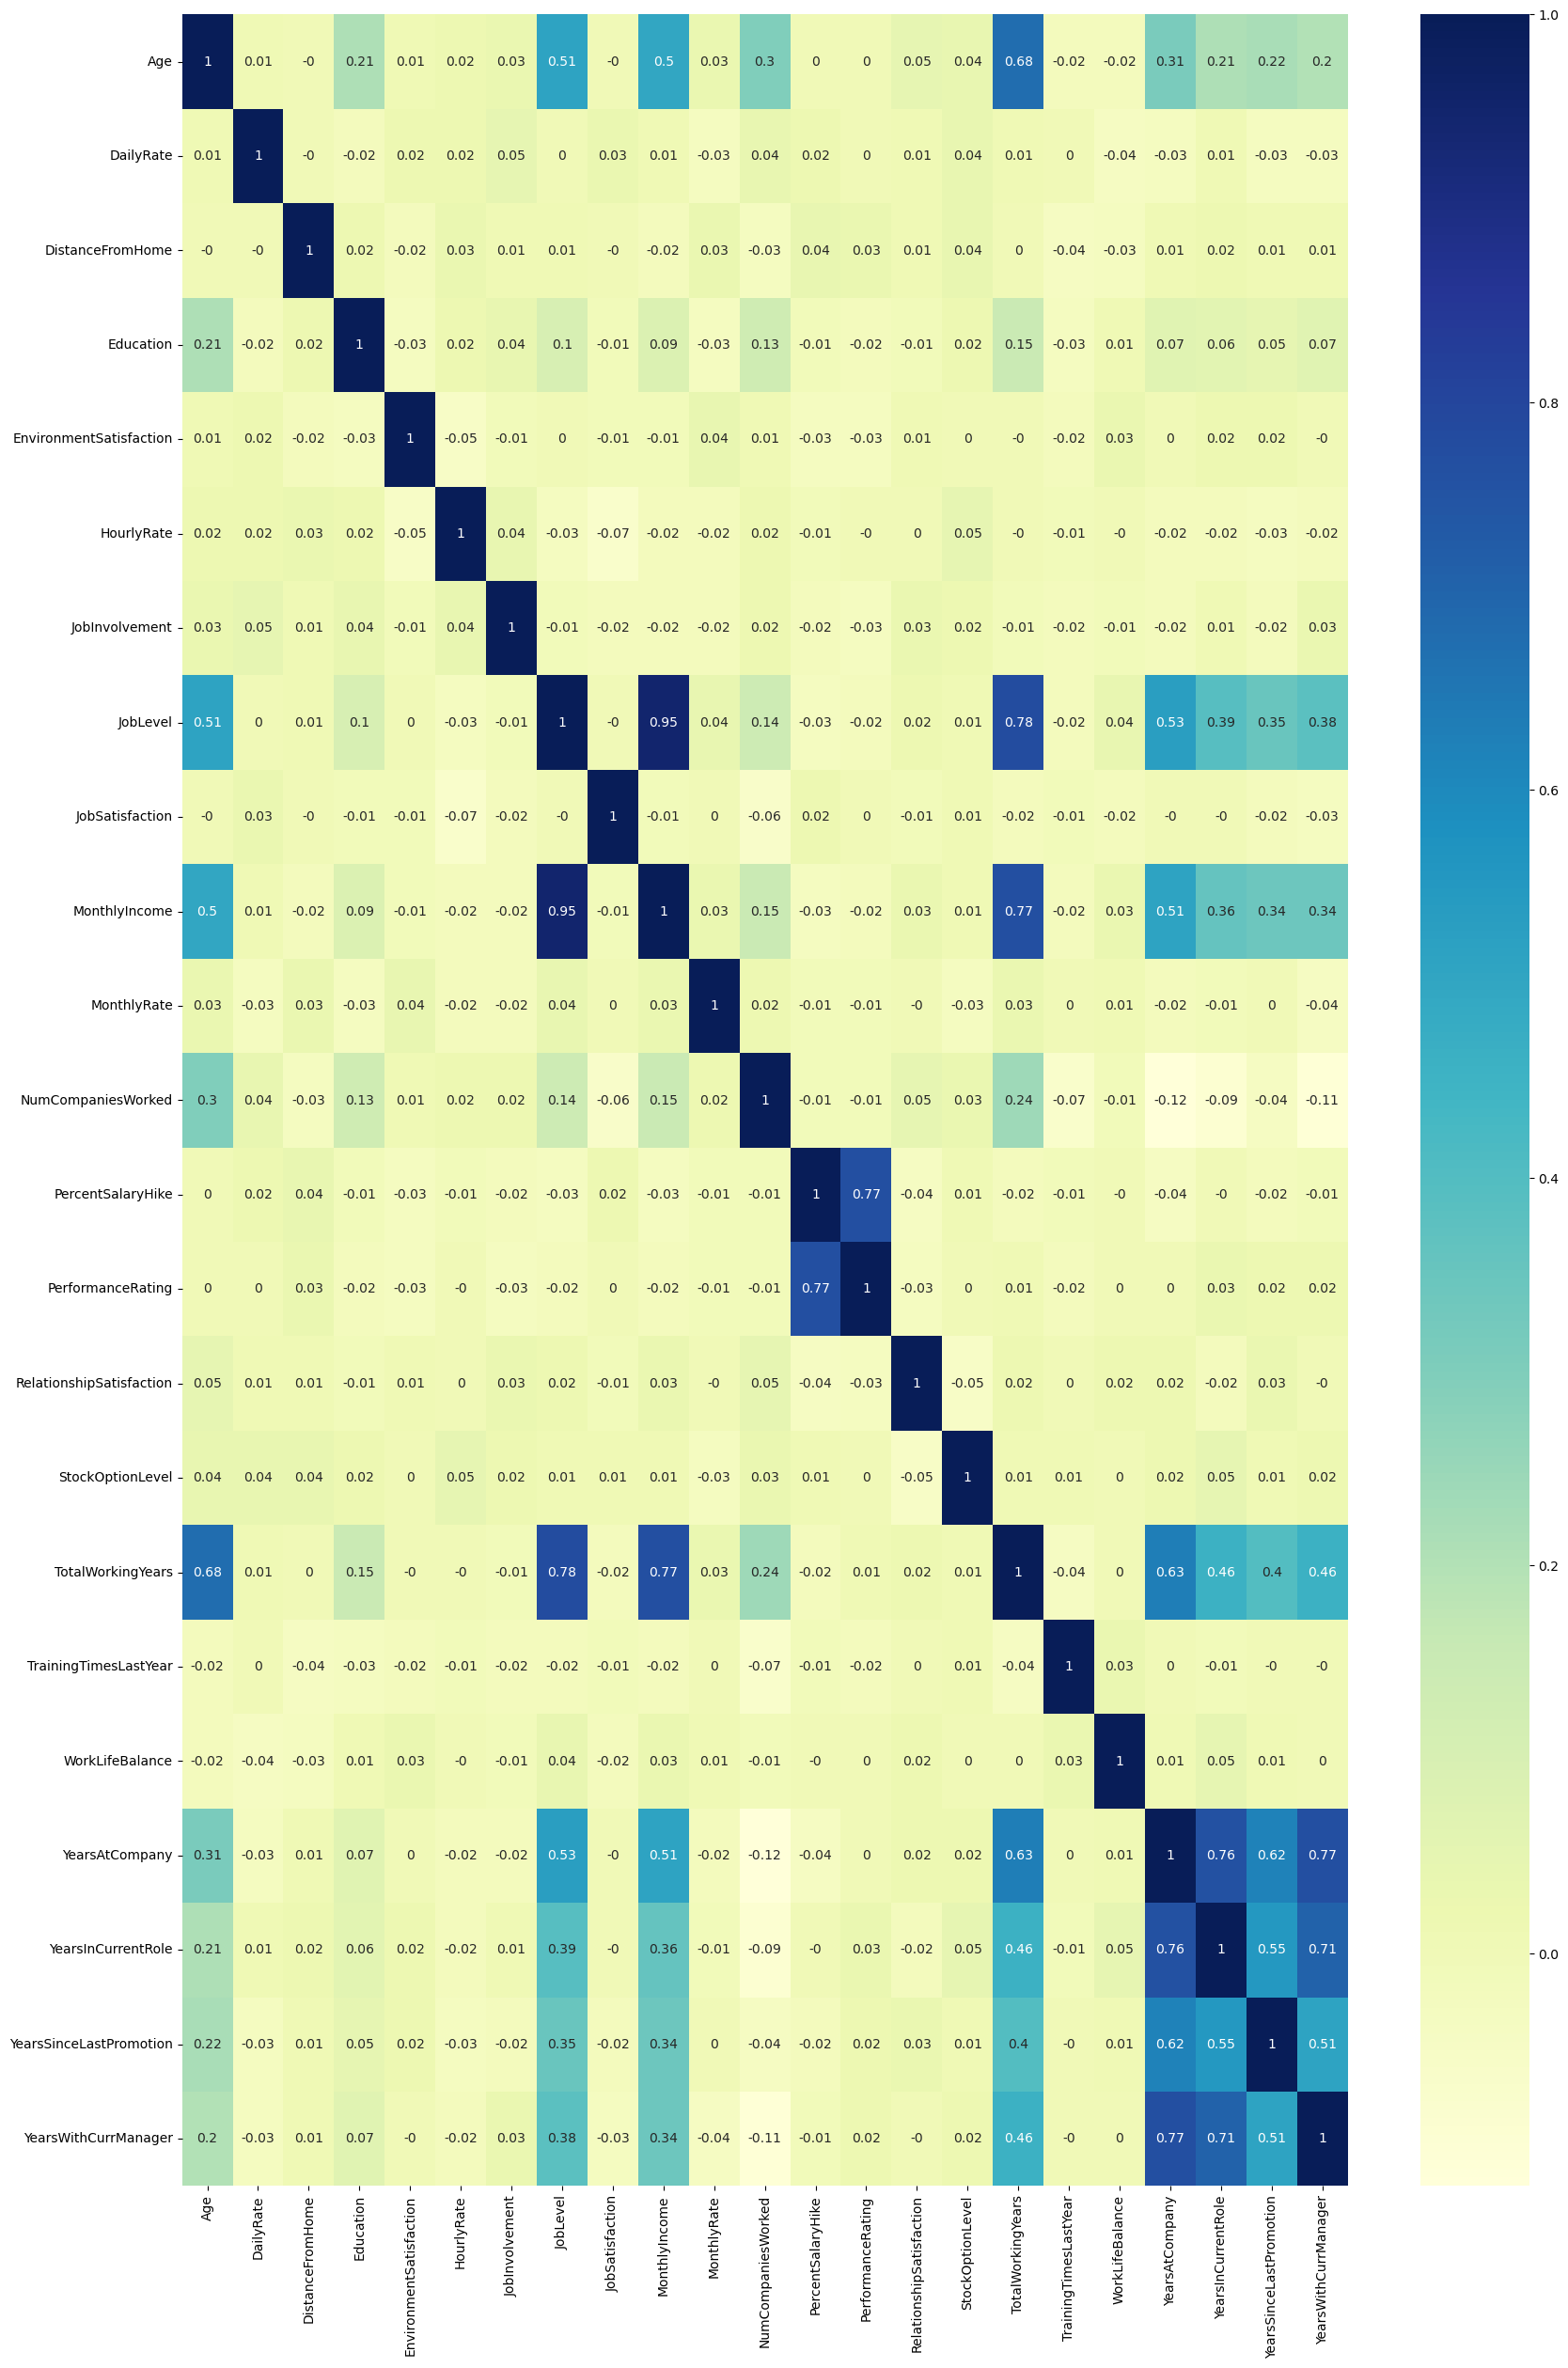

In [122]:
plt.figure(figsize=(20,30))
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu") #color palette from https://python-graph-gallery.com/
plt.show()

The correlation matrix shows us that Job Level and Monthly income has a very high correlation. So we can remove one of those features. All the other correlation are below 0.8 which means collinearity should not be an issue especially if we use regression model. 

In [123]:
#chi-square test
import scipy.stats as stats


In [124]:
cat_columns = df.select_dtypes(include=['object']).columns
results = []

for i in range(len(cat_columns)):
    for j in range(i+1, len(cat_columns)):  # Avoid duplicate tests
        col1, col2 = cat_columns[i], cat_columns[j]
        contingency_table = pd.crosstab(df[col1], df[col2])
        chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
        
        #Store results
        results.append({
            "Variable 1": col1,
            "Variable 2": col2,
            "Chi2 Statistic": chi2,
            "P-Value": p,
            "Degrees of Freedom": dof
        })

# Convert to DataFrame
chi2_results = pd.DataFrame(results)
chi2_results

,Variable 1,Variable 2,Chi2 Statistic,P-Value,Degrees of Freedom
0,Attrition,BusinessTravel,24.182414,5.608614e-06,2
1,Attrition,Department,10.796007,4.525607e-03,2
2,Attrition,EducationField,16.024674,6.773980e-03,5
3,Attrition,Gender,1.116967,2.905724e-01,1
4,Attrition,JobRole,86.190254,2.752482e-15,8
5,Attrition,MaritalStatus,46.163677,9.455511e-11,2
6,Attrition,Over18,0.000000,1.000000e+00,0
7,Attrition,OverTime,87.564294,8.158424e-21,1
8,BusinessTravel,Department,0.201885,9.952355e-01,4
9,BusinessTravel,EducationField,5.168394,8.796489e-01,10


Based on the output of the chi-square test, the values that have a strong relationship to attrition are Job Role and Overtime.  Values that we can drop are over18 and gender

Now that we have performed EDA, we have to take steps in preparing our data for the model. We are going to use sklearn's module label encoder to transform the categorical data into something that the ML model can process. It assigns a unique number to the object datatypes in the df. 

In [125]:
df1=df.copy()
colstodrop=['EmployeeCount','StandardHours','EmployeeNumber','JobLevel','Gender','Over18']
df1.drop(df1[colstodrop],axis=1,inplace=True)

In [126]:
#lets start with our target variable

from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
df1['Attrition']=label.fit_transform(df1.Attrition)


In [127]:
#use one hot encoding to transform object columns to numeric input
df2 = pd.get_dummies(df1)

In [128]:
#Refine the dataset for modeling
from sklearn.model_selection import train_test_split, GridSearchCV

In [129]:
#identify the target variable
X = df2.drop('Attrition', axis=1)
y = df2.Attrition

#create an 80/20 train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,
                                                    stratify=y)

The standard scaler normalizes the chosen feature to have a mean of 0 and a standard deviation on 1. This allows the data distribution of the feature to remain the same, but prevents a large feature to have an impact on the target variable because of its magnitude

In [130]:
from sklearn.preprocessing import StandardScaler

In [131]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
X_std = scaler.transform(X)

In [132]:
#review the target variables to ensure the split is close between the train/test set

train_attr_no = (y_train.value_counts()[0] / y_train.shape)[0]
train_attr_yes = (y_train.value_counts()[1] / y_train.shape)[0]
test_attr_no = (y_test.value_counts()[0] / y_test.shape)[0]
test_attr_yes = (y_test.value_counts()[1] / y_test.shape)[0]

print("TRAINING SET")
print(f"Attrition_NO: {train_attr_no * 100:.2f}%")
print(f"Attrition_YES: {train_attr_yes * 100 :.2f}%")
print("TEST SET")
print(f"Staying Rate: {test_attr_no * 100:.2f}%")
print(f"Leaving Rate: {test_attr_yes * 100 :.2f}%")

TRAINING SET
Attrition_NO: 83.84%
Attrition_YES: 16.16%
TEST SET
Staying Rate: 84.01%
Leaving Rate: 15.99%


# Apply machine learning model

This part of the project applies different machine learning models to the dataset to predict the features that have the most influence on attrition. To test the performance of our mode, we will be using metrics from the sklearn library that evaluates the models

In [133]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score

In [134]:
#this function will produce a report to understand how our model performed
def model_eval(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    #this function visualizes the output of the confusion matrix
    def viz(y_true, y_pred, title):
        cm = confusion_matrix(y_true, y_pred)
        plt.figure(figsize=(6,4))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=set(y_true), yticklabels=set(y_true))
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title(title)
        plt.show()
    
    print("TRAIN:")
    viz(y_train, y_train_pred, "Confusion Matrix: Train Output")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{classification_report(y_train, y_train_pred)}")

    print("TEST")
    viz(y_test, y_test_pred, "Confusion Matrix: Test Output")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{classification_report(y_train, y_train_pred)}")

The first model I am going to use is Logistic Regression. It is widely use for binary classification, in which case, our target variable is attrition yes (1) and attrition no (0). In this model, we have to assume that the variables are independent of each other. During our EDA, we explored the relationships in our model and removed the ones that are highly dependent.


In [135]:
from sklearn.linear_model import LogisticRegression

TRAIN:


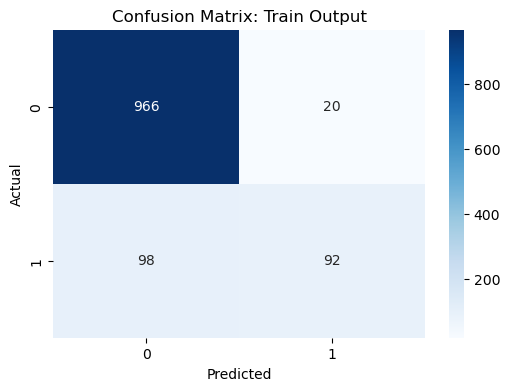

ACCURACY SCORE:
0.8997
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       986
           1       0.82      0.48      0.61       190

    accuracy                           0.90      1176
   macro avg       0.86      0.73      0.78      1176
weighted avg       0.89      0.90      0.89      1176

TEST


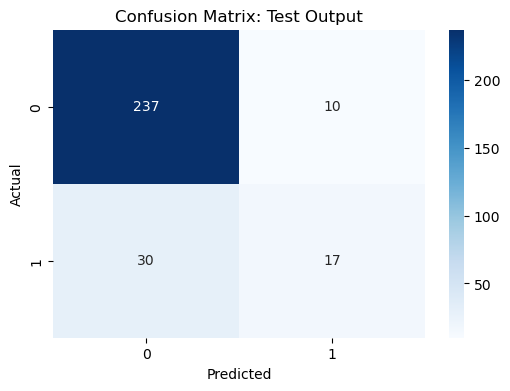

ACCURACY SCORE:
0.8639
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       986
           1       0.82      0.48      0.61       190

    accuracy                           0.90      1176
   macro avg       0.86      0.73      0.78      1176
weighted avg       0.89      0.90      0.89      1176



In [137]:
# run the model using Lasso/l1 regularization to help reduce overfitting
# by removing less important features since our dataset still has a lot of features

model1_LR = LogisticRegression(solver='liblinear', penalty='l1')
model1_LR.fit(X_train_std, y_train)

#use the model_eval function to analyze performance
model_eval(model1_LR, X_train_std, X_test_std, y_train, y_test)






Interpretation: Using the Logistic Regression model, we see that the both the training and test data had a high accuracy score (90% and 86%, respectively) which means that it is able to distinguish patterns within the dataset which is able to identify what belongs to the attrition and no attrition class. However, the recall for 1 (attrition_yes) is at 48%. We see this in the correlation matrix where the models predicted a high negative, attrition_no, which mirrors the characteristics of our dataset. However, we see a lot of false negatives where the model predicted attrition_no and the actual value is an attrition_yes. This means that while our model performs well at predicting attr_yes, it struggles to identify attr_no, which is the key value we want to identify in this project. 

# Model 2 Random Forest

After seeing the performance of the logistic regression, I would like to use a random forest classifier for the next algorithm. Randomized forest uses multiple decision trees and combining the outputs to determine the class of our dependent variables.

In [138]:
from sklearn.ensemble import RandomForestClassifier

TRAIN:


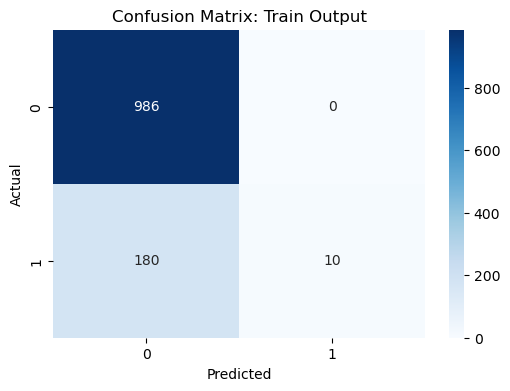

ACCURACY SCORE:
0.8469
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       986
           1       1.00      0.05      0.10       190

    accuracy                           0.85      1176
   macro avg       0.92      0.53      0.51      1176
weighted avg       0.87      0.85      0.78      1176

TEST


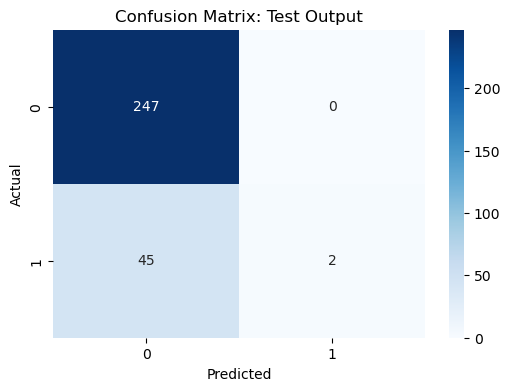

ACCURACY SCORE:
0.8469
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       986
           1       1.00      0.05      0.10       190

    accuracy                           0.85      1176
   macro avg       0.92      0.53      0.51      1176
weighted avg       0.87      0.85      0.78      1176



In [139]:
model2_RF = RandomForestClassifier(
    n_estimators=100, 
    max_features="sqrt", 
    max_depth=6, 
    max_leaf_nodes=6
)

model2_RF.fit(X_train_std, y_train)

#use the model_eval function to analyze performance
model_eval(model2_RF, X_train_std, X_test_std, y_train, y_test)



The random forest model did not perform better than the first model with an accuracy score of about 85% for both. The recall for attr_no is better but the recall for attr_yes underperformed compared to the logistic regression model. However, Random forest allows for hyperparameter which allows us to fine-tune the settings to improve our model. There are two types: GridSearch where every combination of the parameter is used and then fit into the data to see which one best applies to the model and Randomized Search where the combination of the parameters are evaluated to see the best

In [140]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [97]:
#define hyperparameters
hyperparameters = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(RandomForestClassifier(),
                           param_grid=hyperparameters)
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)

RandomForestClassifier(max_depth=15, min_samples_split=5, n_estimators=400)


TRAIN:


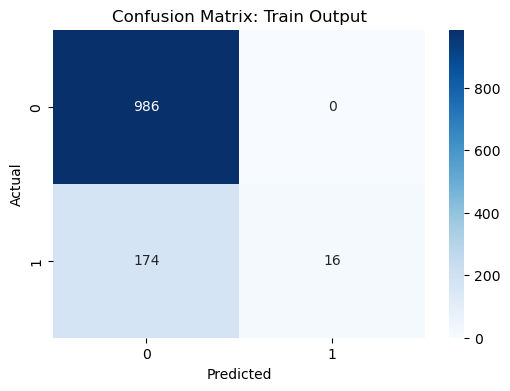

ACCURACY SCORE:
0.8520
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       986
           1       1.00      0.08      0.16       190

    accuracy                           0.85      1176
   macro avg       0.93      0.54      0.54      1176
weighted avg       0.87      0.85      0.80      1176

TEST


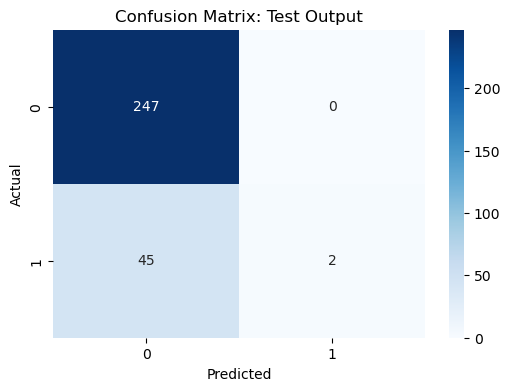

ACCURACY SCORE:
0.8469
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       986
           1       1.00      0.08      0.16       190

    accuracy                           0.85      1176
   macro avg       0.93      0.54      0.54      1176
weighted avg       0.87      0.85      0.80      1176



In [141]:
# update the model with parameters chosen by GridSearchCV

model3_RFGSCV = RandomForestClassifier(
    n_estimators=400, 
    max_features="sqrt", 
    max_depth=15, 
    min_samples_split=5,
    max_leaf_nodes=6
)

model3_RFGSCV.fit(X_train_std, y_train)

#use the model_eval function to analyze performance
model_eval(model3_RFGSCV, X_train_std, X_test_std, y_train, y_test)



Interpretation: The GridSearchCV hyperparameter tuning did not improve the evaluation score of the original Random Classifier with an accuracy score of 85 for train output and 84 for test output.

In [142]:
random_search = RandomizedSearchCV(RandomForestClassifier(),
                                   hyperparameters)
random_search.fit(X_train, y_train)
print(random_search.best_estimator_)

RandomForestClassifier(max_depth=15, max_features='log2', min_samples_split=10,
                       n_estimators=200)


TRAIN:


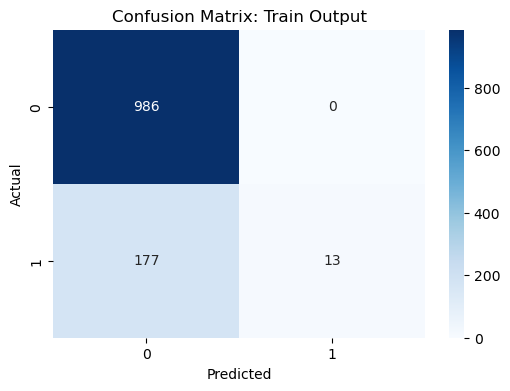

ACCURACY SCORE:
0.8495
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       986
           1       1.00      0.07      0.13       190

    accuracy                           0.85      1176
   macro avg       0.92      0.53      0.52      1176
weighted avg       0.87      0.85      0.79      1176

TEST


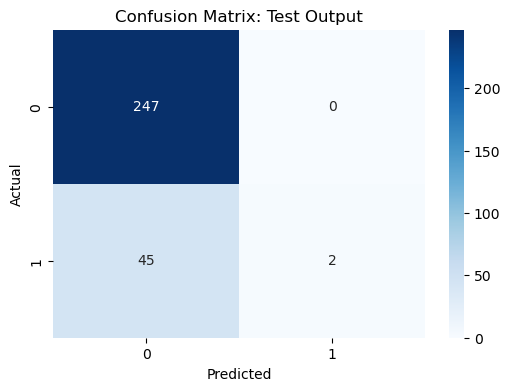

ACCURACY SCORE:
0.8469
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       986
           1       1.00      0.07      0.13       190

    accuracy                           0.85      1176
   macro avg       0.92      0.53      0.52      1176
weighted avg       0.87      0.85      0.79      1176



In [143]:
model4_RFRSCV = RandomForestClassifier(
    n_estimators=200, 
    max_features="sqrt", 
    max_depth=15, 
    min_samples_leaf=2,
    max_leaf_nodes=6
)

model4_RFRSCV.fit(X_train_std, y_train)

#use the model_eval function to analyze performance
model_eval(model4_RFRSCV, X_train_std, X_test_std, y_train, y_test)



Interpretation: While the RandomSearch performed slightly better than the Grid Search model - both hyperparameter tuning did not perform better than the initial RandomForest Classifier

Now that we have determined that the Logistic Regression is the best model for this dataset, we can extract the features that have the most effect on attrition using coefficients. These are indicators of the relationship between each variable to attrition. 

In [144]:
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model1_LR.coef_[0]})

#sort the df to highlight the metrics with the most impact 
# using the absolute value as negative correlations are indicators of relationships as well

feature_importance['Abs_Coefficient'] = np.abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)
feature_importance.head(3)


,Feature,Coefficient,Abs_Coefficient
20,YearsSinceLastPromotion,0.516164,0.516164
47,OverTime_Yes,0.495839,0.495839
36,JobRole_Laboratory Technician,0.489835,0.489835


Interpretation: This tells us that the employees who work overtime are at most risk for attrition. Combined with factors such as YearsSinceLastPromotion and if their JobRole was a Laboratory Technician makes them a candidate for the possibility of leaving their current position within this company.
    